# Buisness Case:- With the healthy lifestyle city datset we need to cluster healthy lifestyle city into certain group.

In [1]:
### import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOAD DATA

In [2]:
data = pd.read_csv('healthy_lifestyle_city_2021.csv',na_values=['-'])

#### Basic cheacks

In [3]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


In [4]:
data.tail()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
39,Milan,40,1915.0,£1.15,19.90%,82.7,67.19,1718.0,6.38,110,2396,£53.49
40,"Washington, D.C.",41,2528.0,£1.45,36.20%,78.8,39.18,1779.0,6.94,83,744,£65.99
41,New York,42,2535.0,£1.32,36.20%,78.8,57.36,1779.0,6.94,359,3081,£64.66
42,Moscow,43,1901.0,£0.41,23.10%,69.5,57.63,1965.0,5.54,322,3206,£31.40
43,Mexico City,44,2555.0,£0.45,28.90%,76.4,82.78,2137.0,6.46,192,1313,£41.99


In [5]:
data.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

* Total 12 features in dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


#### Examine data

In [7]:
data.describe()

,Rank,Sunshine hours(City),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,43.000000,44.00000,43.000000,33.000000,44.000000,44.000000,44.000000
mean,22.500000,2245.860465,78.17500,51.122326,1672.909091,6.435000,213.977273,1443.113636
std,12.845233,567.403719,5.30437,21.856190,179.626933,0.991202,127.190297,1388.803270
min,1.000000,1405.000000,56.30000,13.080000,1380.000000,3.570000,23.000000,250.000000
25%,11.750000,1798.500000,75.40000,34.355000,1540.000000,5.870000,125.250000,548.000000
50%,22.500000,2066.000000,80.40000,52.640000,1686.000000,6.900000,189.500000,998.000000
75%,33.250000,2629.000000,81.80000,66.630000,1779.000000,7.175000,288.250000,1674.250000
max,44.000000,3542.000000,83.20000,91.740000,2137.000000,7.800000,585.000000,6417.000000


* Constant column is not present in dataset

## DOMAIN ANALYSIS

##### Dataset introduction:- healthy lifestyle cities in 2021 with different features
* City:- total 44 healthy life-style city in 2021.

* Rank:- rank of healty life-style city.

* Sunshine hours(City):- Sunshine hours is a measure of the amount of direct sunshine a site receives(per year)

* Cost of a bottle of water(City):- cost of water bottel in pound.

* Obesity levels(Country):-A condition characterised by abnormal or excessive fat accumulation.

* Life expectancy(years) (Country):- Life expentancy of healthy lifestyle city.

* Pollution:- the Comprehensive Environmental Pollution Index (CEPI) scores of the critically polluted industrial clusters/areas. The index captures the various dimensions of environment including air, water and land.

* Annual avg. hours worked :- working hours (avg 1,730 hours per year, or 36.04 hours per week).

* Happiness levels(Country)	:-It is based on national happiness as well as based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.

* Outdoor activities(City):-activity that occurs in an unroofed area as part of a permitted use on a lot and any outdoor display of material & Outdoor activity means an athletic, entertainment or similar activity.(count of outdoor activities in per year).

* Number of take out places(City):- Total take-out places in city.

* Cost of a monthly gym membership(City):- Monthly cost of gym in pound.

## EXPLOTARY DATA ANALYSIS

##### 1.Univariate Analysis

In [8]:
# remove special characters
data = data.replace('[\£,%]','',regex=True)
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.40,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.00,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.10,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.60,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.70,79.8,21.24,1380.0,7.64,154,523,32.53


In [ ]:
import sweetviz as sv

univariate_report = sv.analyze(data)
univariate_report.show_html()

#### Observation:-
* Rank:- healthy life-style city rank range between 1 to 44.
* Sunshie-city:- the maximun sunshine hours is 3542 and lowest sunshine hours is 1405.
* Life expentancy:- the average life expentancy of healty life-style city is 78.2 year.
* pollution index score :- the range of pollution index score between 13.1 to 91.7.
* happiness level:- average of happiness level of healthy life-style city is 6.44.
* outdoor activities :- maximum 585 & minimum 23 outdoor activities in healty life-style city.
* No of take out places:- the take out places range between 250 to 6417.

##### 2.Bivariate analysis

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Shape of your Data Set: (44, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    6 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15
Time to run AutoViz (in seconds) = 1.668


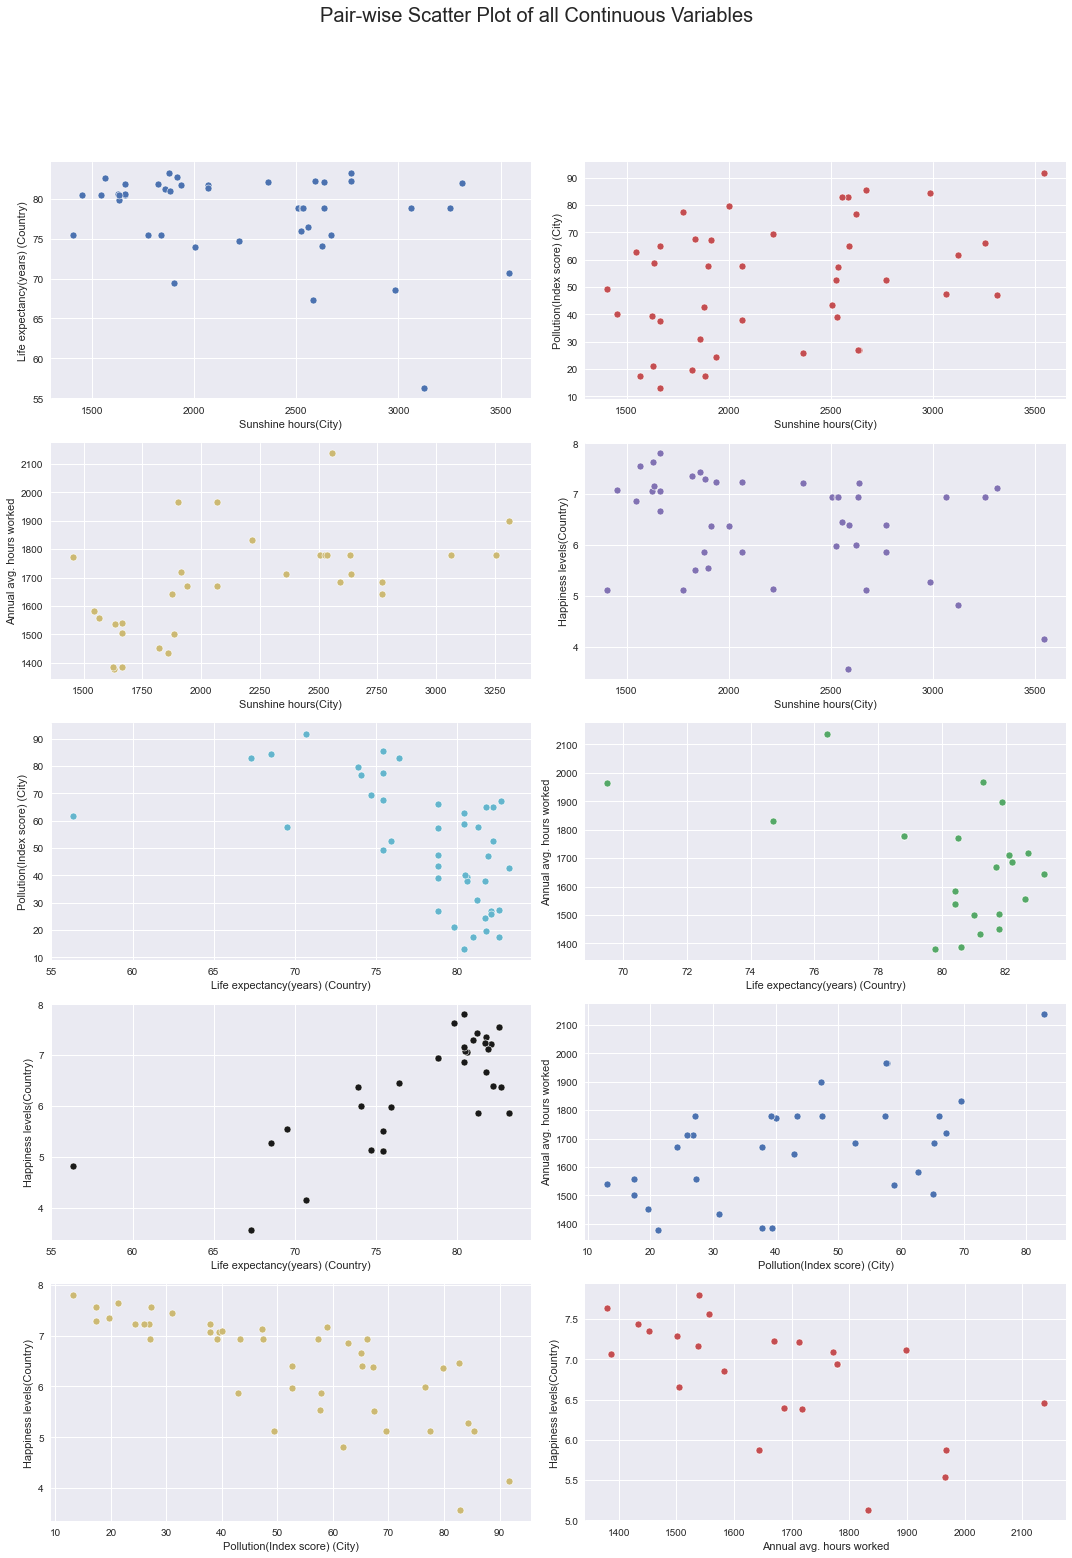

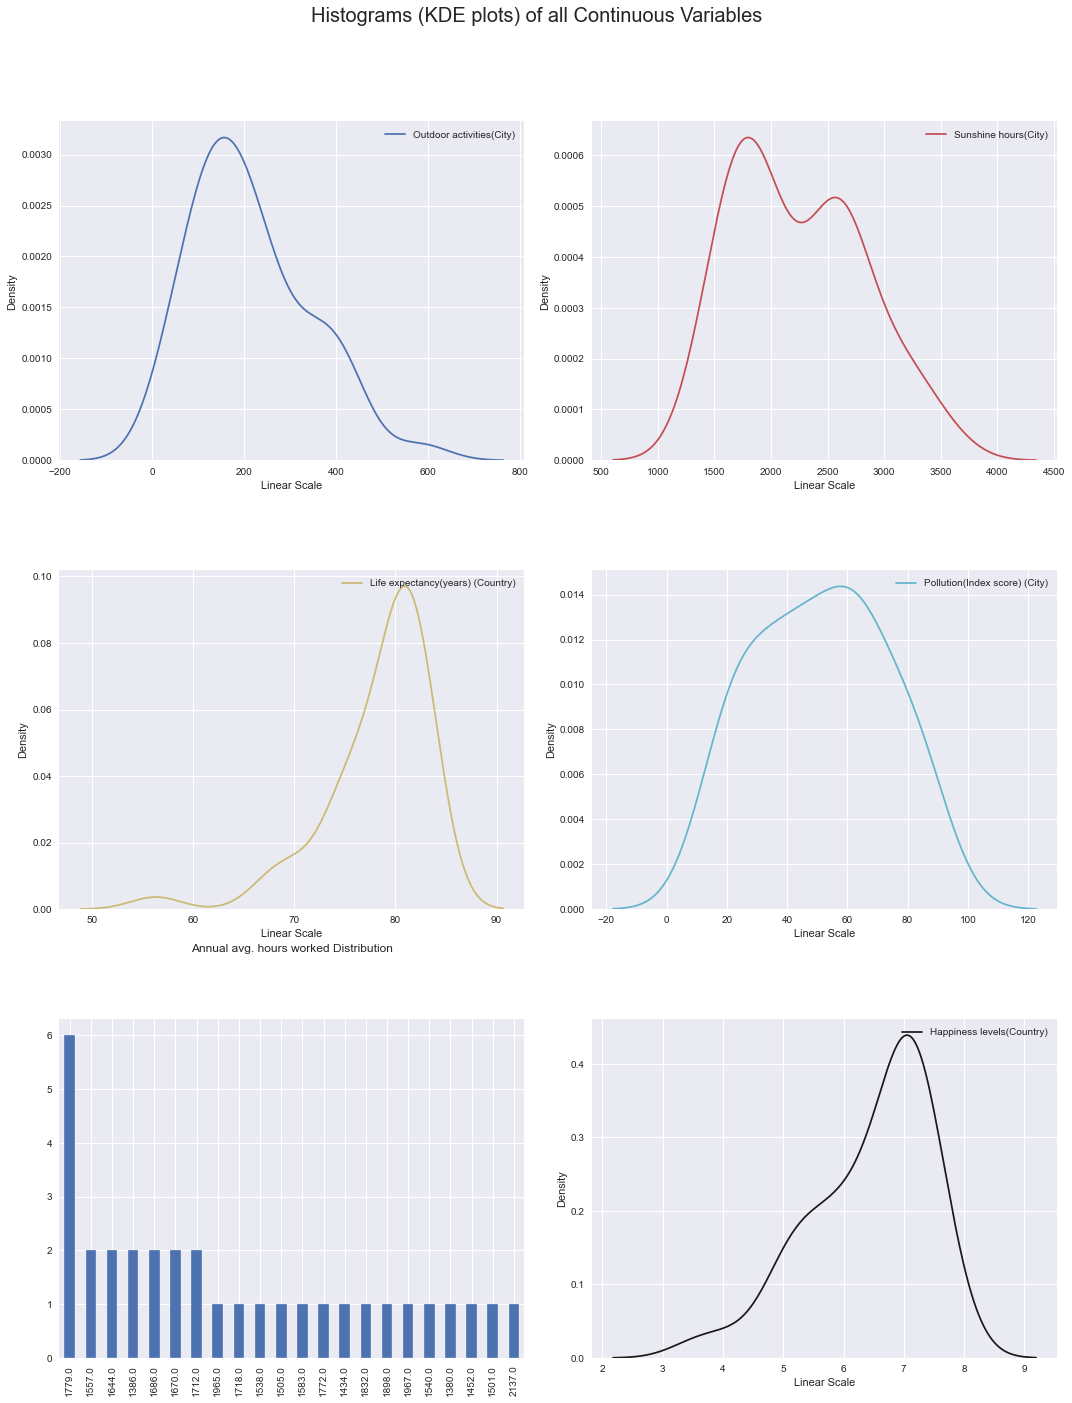

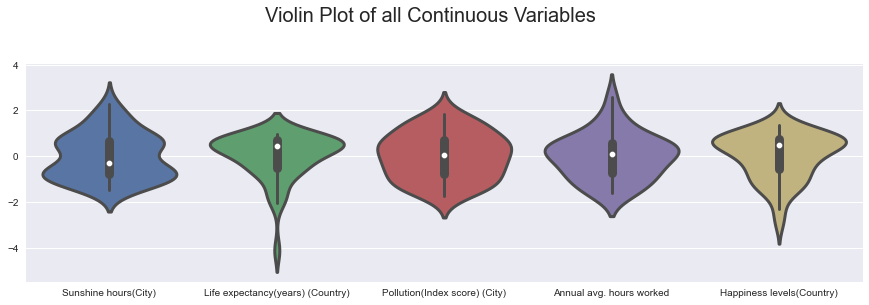

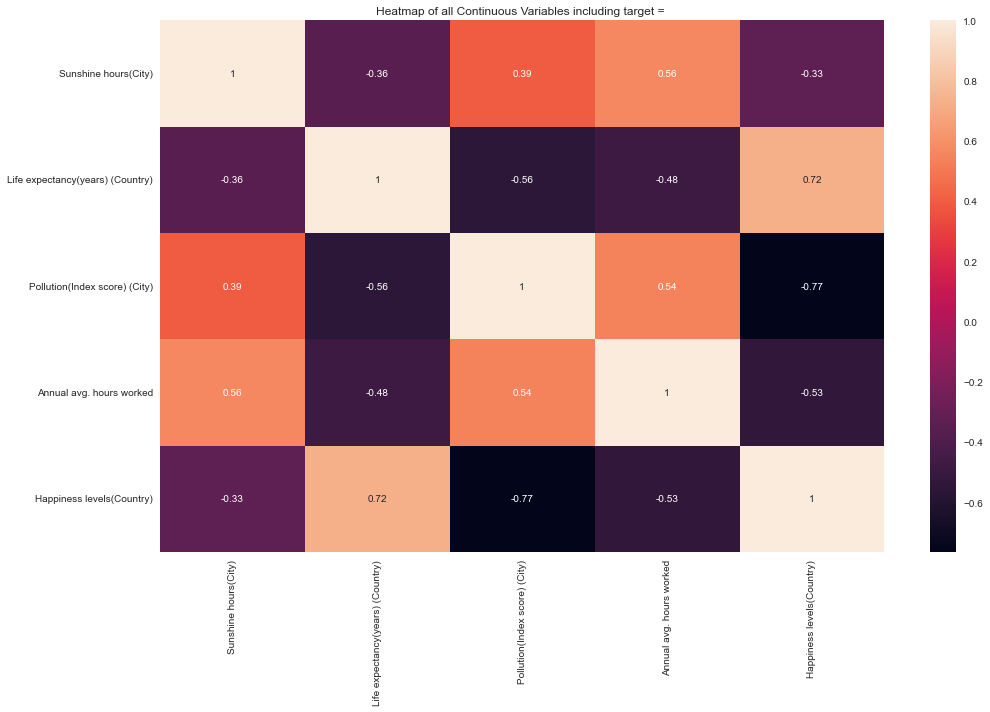

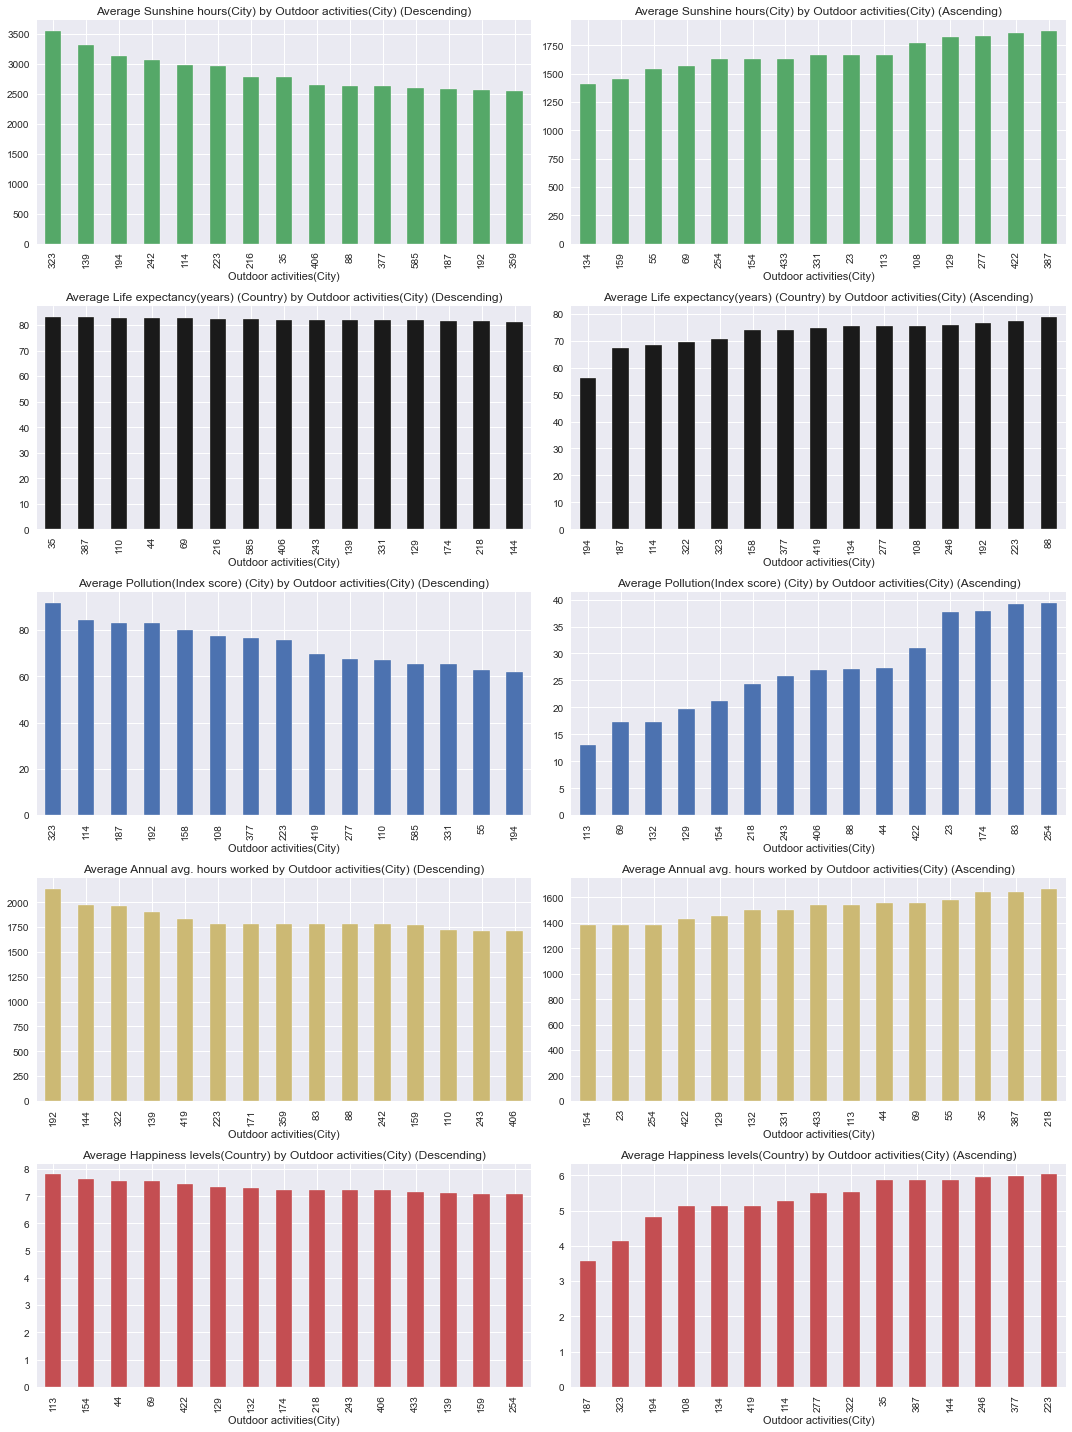

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

av = AutoViz_Class()

filename = ""
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=data,
    header=0,
    verbose=0,
    lowess=False,
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    #save_plot_dir=None,
    chart_format='html'
)

##### 3.Multivariate analysis

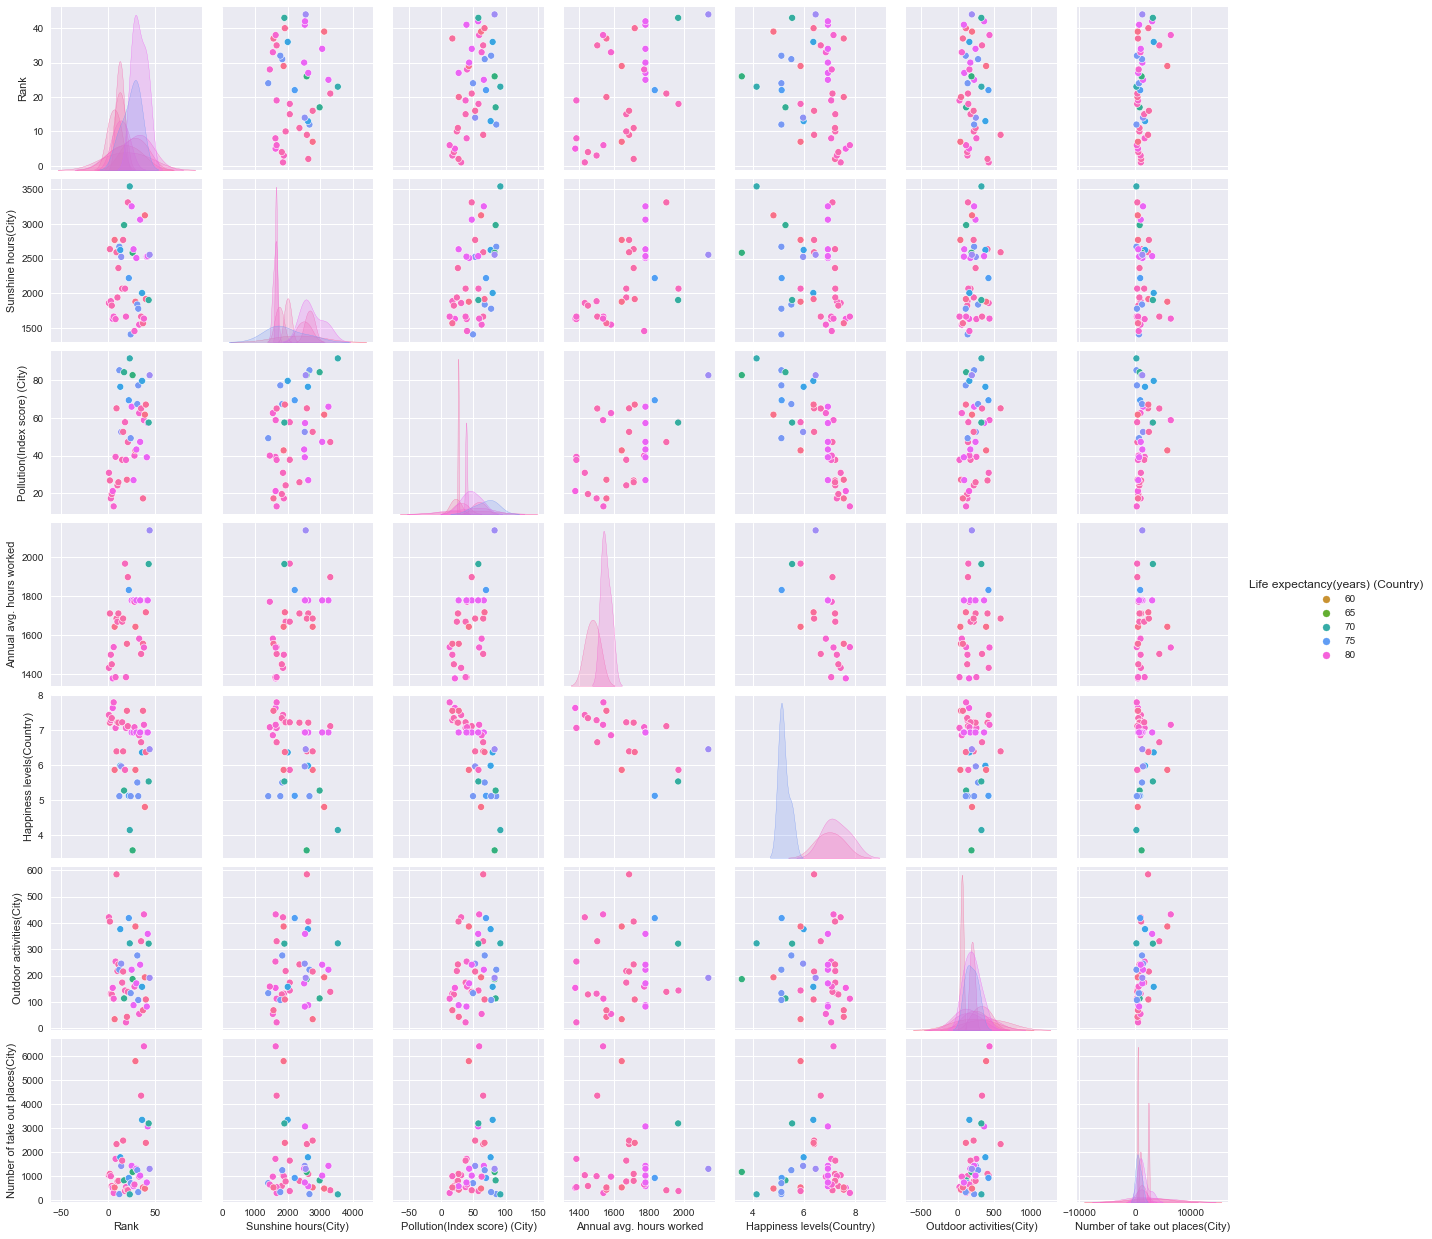

In [10]:
# ploting pair plot for multivariate analysis
sns.pairplot(data,hue='Life expectancy(years) (Country)',data=data,palette='husl')
plt.show()

## DATA PREPROCESSING / FEATURE ENGINEARING

##### 1.cheack missing value

In [11]:
data.isnull().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

##### 2.checking the distribution before value imputation


In [12]:
data1 = data[['Sunshine hours(City)','Cost of a bottle of water(City)','Obesity levels(Country)',
              'Life expectancy(years) (Country)','Pollution(Index score) (City)','Annual avg. hours worked',
              'Happiness levels(Country)','Outdoor activities(City)','Number of take out places(City)',
              'Cost of a monthly gym membership(City)']]

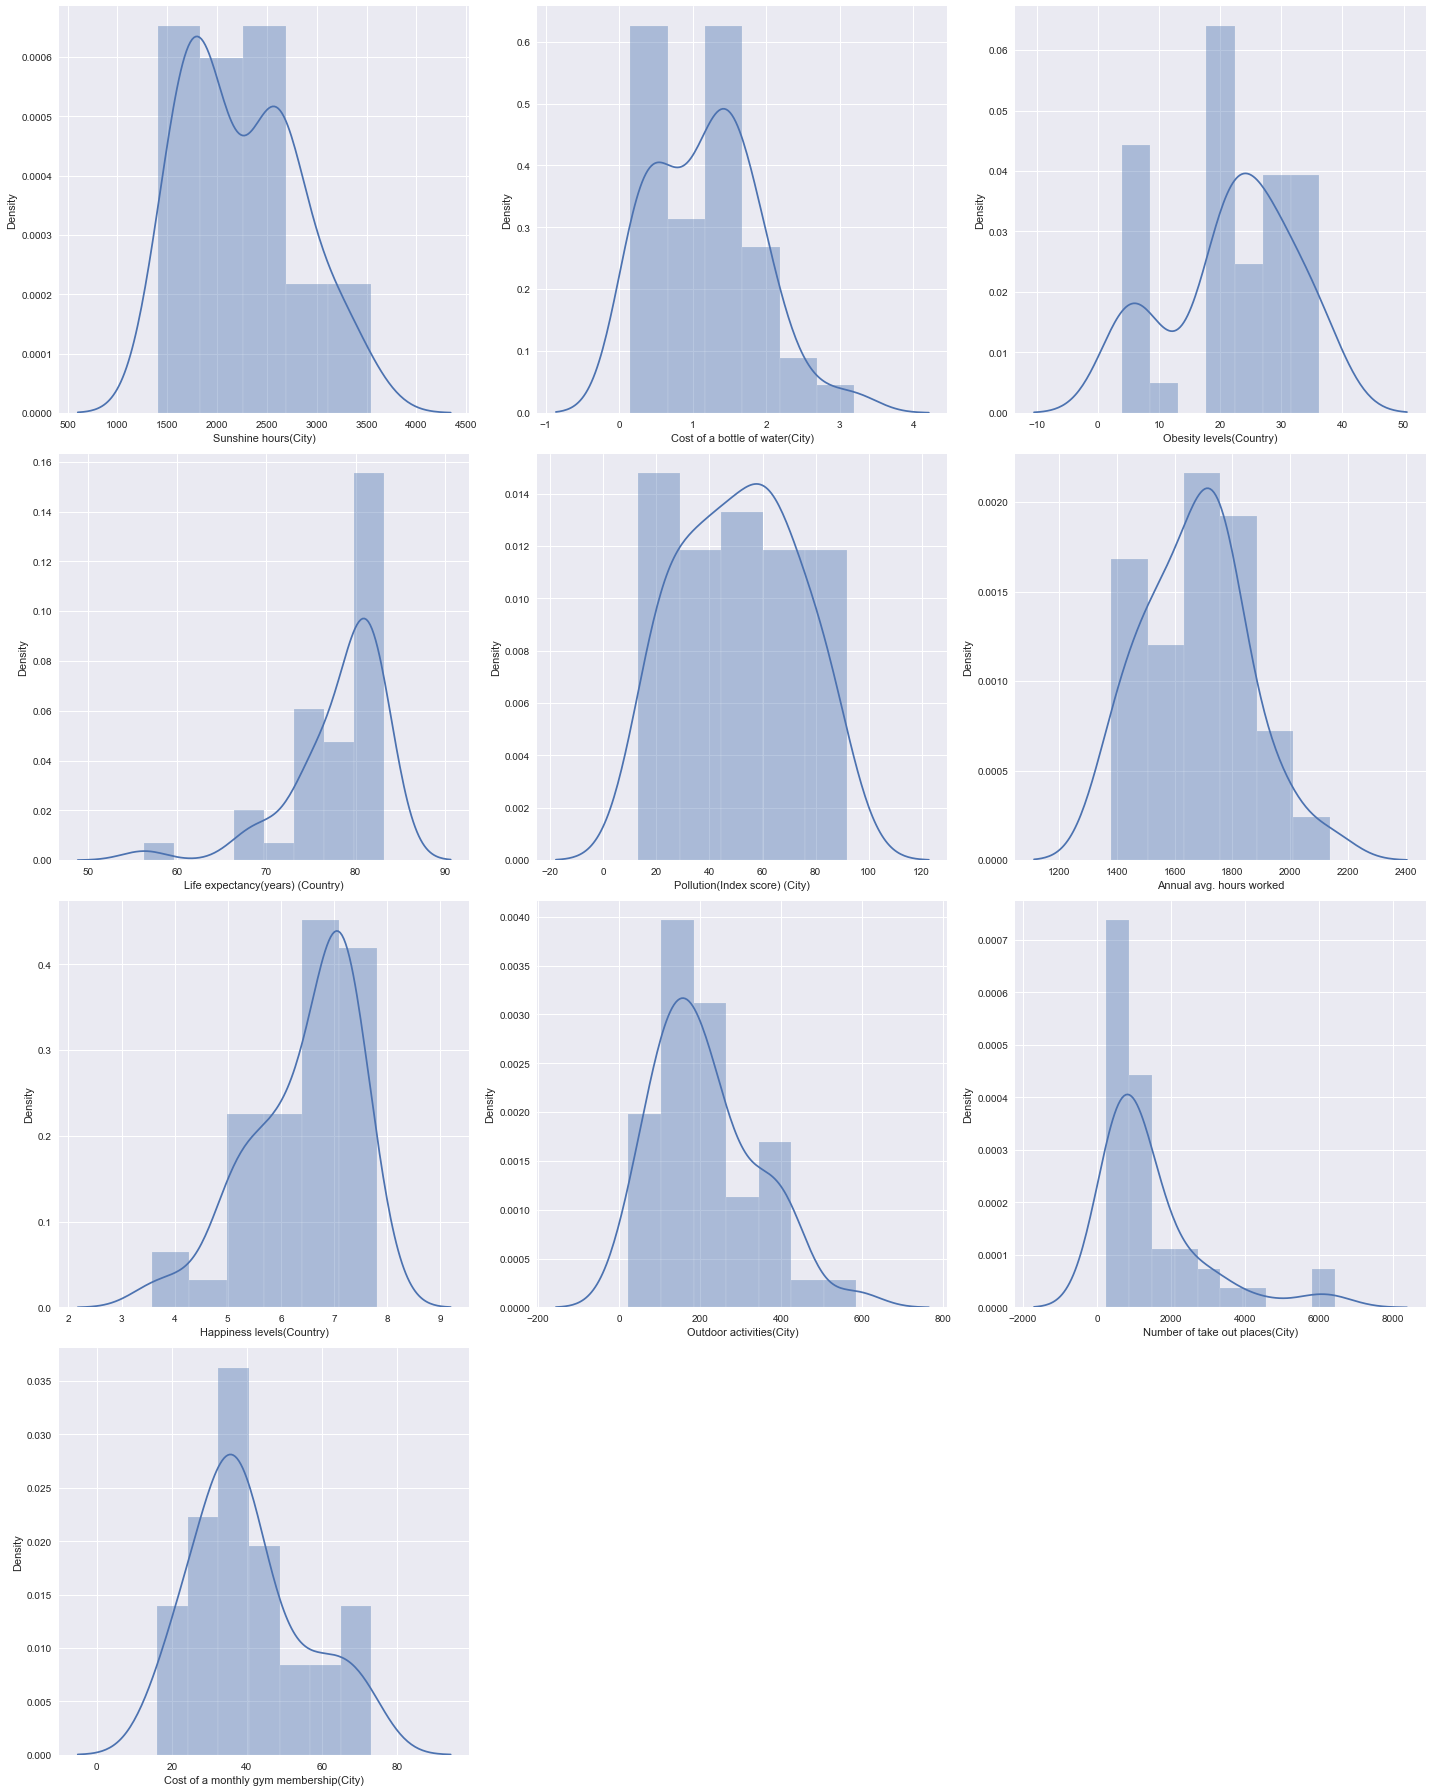

In [13]:
plt.figure(figsize=(20,25))
plotno=1

for column in data1:
    if plotno<+15:
        plt.subplot(4,3,plotno)
        sns.distplot(data1[column])
        plt.xlabel(column)
    plotno+=1
plt.tight_layout()

##### Impute missing value

In [14]:
data.loc[data['Sunshine hours(City)'].isnull()==True,'Sunshine hours(City)']=data['Sunshine hours(City)'].median()
data.loc[data['Pollution(Index score) (City)'].isnull()==True,'Pollution(Index score) (City)']=data['Pollution(Index score) (City)'].median()
data.loc[data['Annual avg. hours worked'].isnull()==True,'Annual avg. hours worked']=data['Annual avg. hours worked'].median()

##### Check missing value

In [15]:
data.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

##### 3.Changing data-type

In [16]:
data.astype({'Sunshine hours(City)':'float64','Cost of a bottle of water(City)':'float64',
             'Obesity levels(Country)':'float64','Annual avg. hours worked':'float64',
            'Pollution(Index score) (City)':'float64','Cost of a monthly gym membership(City)':'float64'}).dtypes

City                                       object
Rank                                        int64
Sunshine hours(City)                      float64
Cost of a bottle of water(City)           float64
Obesity levels(Country)                   float64
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)             float64
Annual avg. hours worked                  float64
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)    float64
dtype: object

#### 4.Outlier Handling

In [17]:
box = data[['Sunshine hours(City)','Pollution(Index score) (City)',
           'Annual avg. hours worked','Happiness levels(Country)',
           'Outdoor activities(City)','Number of take out places(City)']]

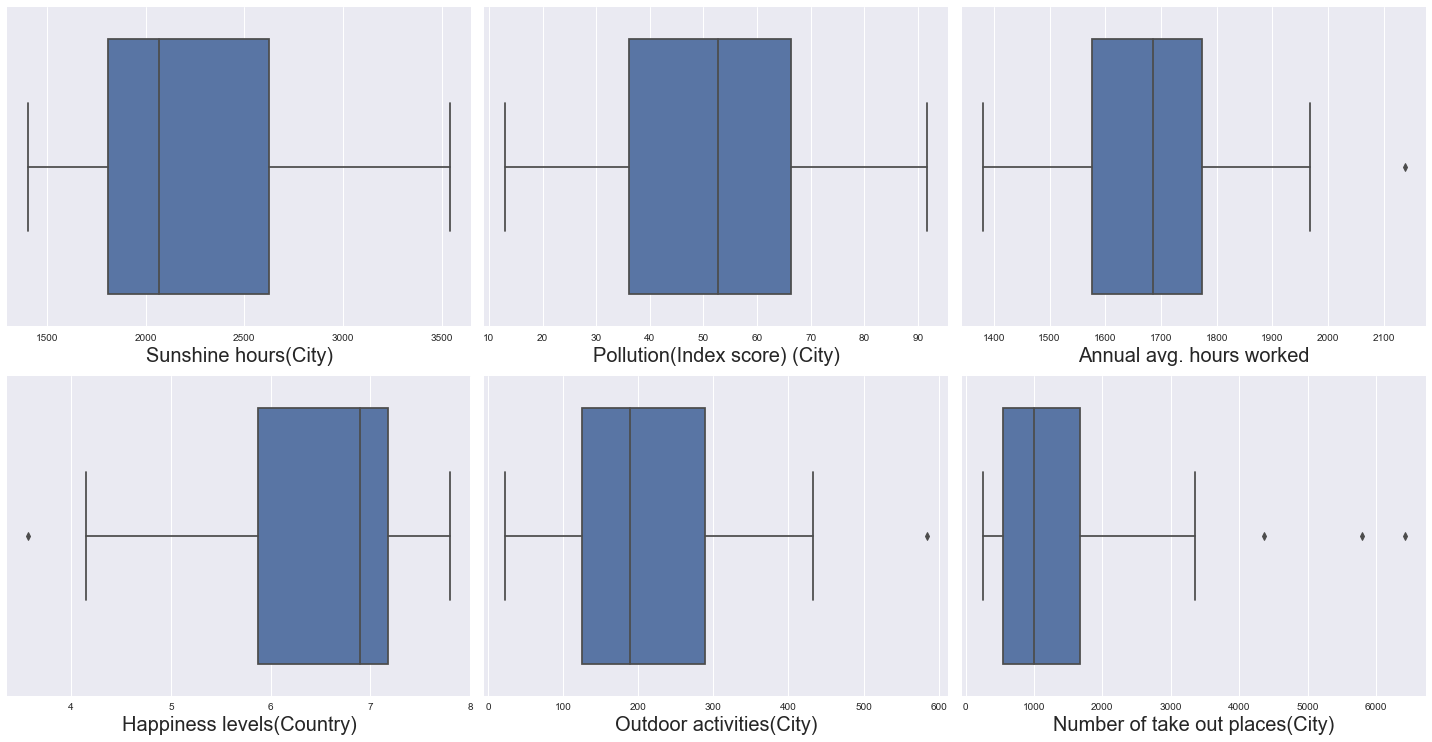

In [18]:
plt.figure(figsize=(20,15))
plotno=1
for column in box:
    if plotno<16:
        plt.subplot(3,3,plotno)
        sns.boxplot(box[column])
        plt.xlabel(column,fontsize=20)
        plotno+=1
plt.tight_layout()

### Sunshine hours city
#### IQR

In [19]:
#  Annual avg. hours worked feature small right side skewed (use iqr)
from scipy import stats

iqr = stats.iqr(data['Annual avg. hours worked'],interpolation='midpoint')
print(iqr)

# min max limit calculation
Q1 = data['Annual avg. hours worked'].quantile(0.25)  # first quantile
Q3 = data['Annual avg. hours worked'].quantile(0.75)  # third quantile
# getting the limits
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

205.5
minimum limit 1268.25
maximum limit 2082.0


In [20]:
# filtering the data
data.loc[data['Annual avg. hours worked']<min_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)


In [21]:
data.loc[data['Annual avg. hours worked']>max_limit]
## So outliers are less than 5% so imputation are required

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
43,Mexico City,44,2555.0,0.45,28.90,76.4,82.78,2137.0,6.46,192,1313,41.99


In [22]:
# impute outlier with median
data.loc[data['Annual avg. hours worked'] > max_limit,'Annual avg. hours worked']=np.median(data['Annual avg. hours worked'])

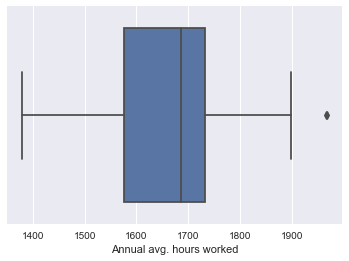

In [23]:
sns.boxplot(data['Annual avg. hours worked'])
plt.show()

### Happiness levels(Country)
#### IQR

In [24]:
# use iqr beacuse of data are skewed left
iqr = stats.iqr(data['Happiness levels(Country)'],interpolation='midpoint')
print(iqr)

Q1 = data['Happiness levels(Country)'].quantile(0.25) # first quantile
Q3 = data['Happiness levels(Country)'].quantile(0.75) # third quantile
### getting the limits
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

1.3199999999999994
minimum limit 3.890000000000001
maximum limit 9.155


In [25]:
### filtering the data
data.loc[data['Happiness levels(Country)'] < min_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
25,Mumbai,26,2584.0,0.15,3.90,67.3,82.84,1686.0,3.57,187,1183,19.54


In [26]:
data.loc[data['Happiness levels(Country)'] > max_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)


In [27]:
data.loc[data['Happiness levels(Country)'] < min_limit,'Happiness levels(Country)']=np.median(data['Happiness levels(Country)'])

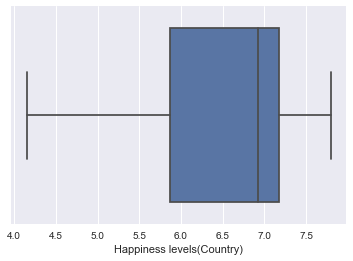

In [28]:
sns.boxplot(data['Happiness levels(Country)']) ## outlier removed
plt.show()

### Outdoor activities(City)
#### IQR

In [29]:
iqr = stats.iqr(data['Outdoor activities(City)'],interpolation='midpoint')
print(iqr)

Q1 = data['Outdoor activities(City)'].quantile(0.25)  ## first quantile
Q3 = data['Outdoor activities(City)'].quantile(0.75)  ## third quantile
### getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

178.0
minimum limit -141.75
maximum limit 555.25


In [30]:
# filtering the data
data.loc[data['Outdoor activities(City)'] < min_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)


In [31]:
data.loc[data['Outdoor activities(City)'] > max_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
8,Barcelona,9,2591.0,1.19,23.80,82.2,65.19,1686.0,6.4,585,2344,37.80


In [32]:
data.loc[data['Outdoor activities(City)'] > max_limit,'Outdoor activities(City)']=np.median(data['Outdoor activities(City)'])

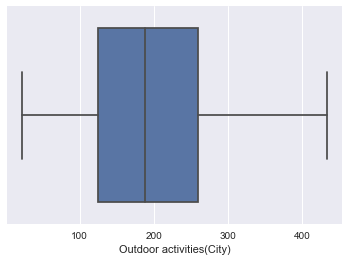

In [33]:
sns.boxplot(data['Outdoor activities(City)'])
plt.show()

### Number of take out places(City)
#### IQR

In [34]:
iqr = stats.iqr(data['Number of take out places(City)'],interpolation='midpoint')
print(iqr)

Q1 = data['Number of take out places(City)'].quantile(0.25)  ## first quantile
Q3 =data['Number of take out places(City)'].quantile(0.75)   ## third quantile
## getting the maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

1147.5
minimum limit -1173.25
maximum limit 3395.5


In [35]:
# filtering the data
data.loc[data['Number of take out places(City)'] < min_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)


In [36]:
data.loc[data['Number of take out places(City)'] > max_limit]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
28,Tokyo,29,1877.0,0.76,4.30,83.2,42.84,1644.0,5.87,387.0,5802,70.82
34,Paris,35,1662.0,1.95,21.60,81.8,65.10,1505.0,6.66,331.0,4363,35.93
37,London,38,1633.0,1.16,27.80,80.4,58.91,1538.0,7.16,433.0,6417,42.71


In [37]:
data.loc[data['Number of take out places(City)'] > max_limit,'Number of take out places(City)']=np.median(data['Number of take out places(City)'])

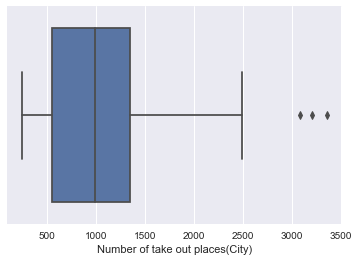

In [38]:
### checking box plot
sns.boxplot(data['Number of take out places(City)'])
plt.show()

* Outliers are removed

##### 4.scaling the data

In [39]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

data[['Sunshine hours(City)','Cost of a bottle of water(City)','Obesity levels(Country)','Life expectancy(years) (Country)',
     'Pollution(Index score) (City)','Annual avg. hours worked','Happiness levels(Country)',
      'Cost of a monthly gym membership(City)','Outdoor activities(City)'
      ,'Number of take out places(City)']] = scalar.fit_transform(data[['Sunshine hours(City)','Cost of a bottle of water(City)',
    'Obesity levels(Country)','Life expectancy(years) (Country)',
     'Pollution(Index score) (City)','Annual avg. hours worked','Happiness levels(Country)',
      'Cost of a monthly gym membership(City)','Outdoor activities(City)','Number of take out places(City)']])

data.head()


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,0.211979,0.580328,0.510836,0.925651,0.226926,0.091993,0.901370,0.973171,0.257005,0.330119
1,Sydney,2,0.576041,0.436066,0.777090,0.959108,0.175184,0.565588,0.841096,0.934146,0.274718,0.448633
2,Vienna,3,0.224146,0.586885,0.501548,0.918216,0.054030,0.206133,0.860274,0.265854,0.244122,0.169530
3,Stockholm,4,0.194665,0.514754,0.517028,0.947955,0.083270,0.122658,0.876712,0.258537,0.112077,0.372370
4,Copenhagen,5,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.956164,0.319512,0.087923,0.288569


## FEATURE SELECTION

##### 1.Remove unique cloumn


In [40]:
data.drop(['City','Rank'],axis=1,inplace=True)
data.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,0.211979,0.580328,0.510836,0.925651,0.226926,0.091993,0.901370,0.973171,0.257005,0.330119
1,0.576041,0.436066,0.777090,0.959108,0.175184,0.565588,0.841096,0.934146,0.274718,0.448633
2,0.224146,0.586885,0.501548,0.918216,0.054030,0.206133,0.860274,0.265854,0.244122,0.169530
3,0.194665,0.514754,0.517028,0.947955,0.083270,0.122658,0.876712,0.258537,0.112077,0.372370
4,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.956164,0.319512,0.087923,0.288569


##### 2.cheack correlation

In [41]:
data2 = data[['Sunshine hours(City)','Cost of a bottle of water(City)','Obesity levels(Country)',
              'Life expectancy(years) (Country)','Pollution(Index score) (City)','Annual avg. hours worked',
              'Happiness levels(Country)','Cost of a monthly gym membership(City)']]

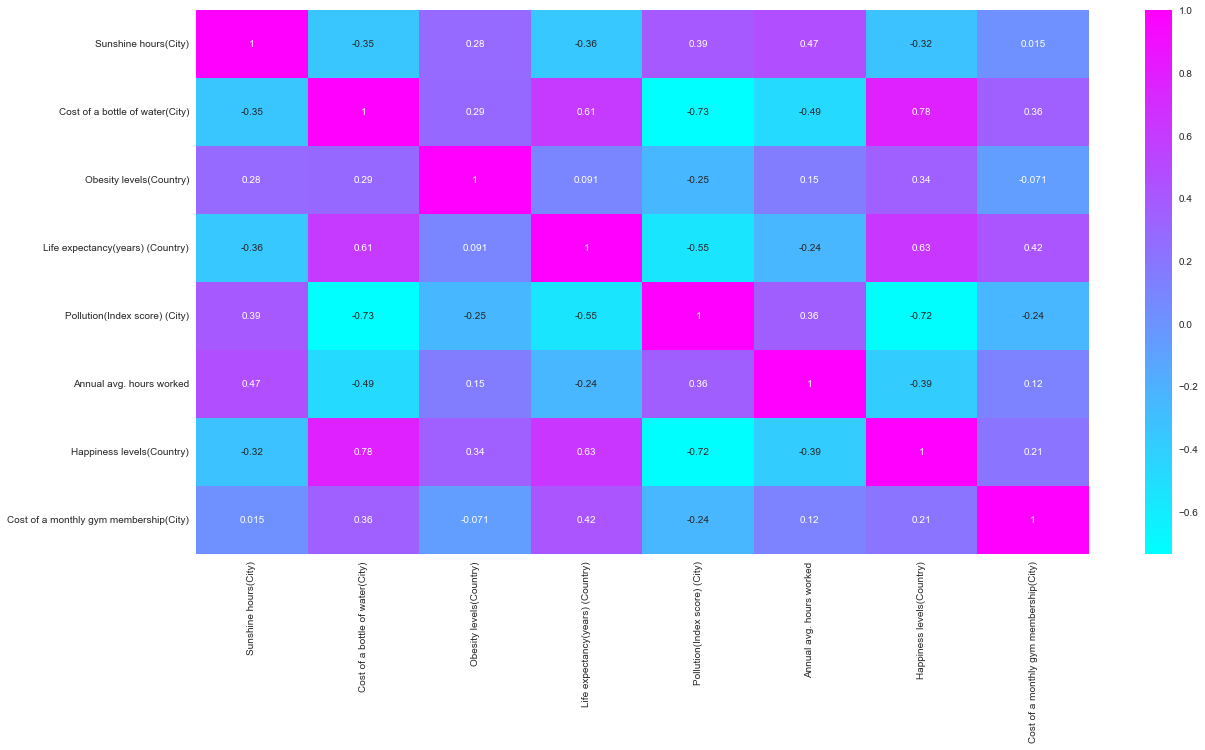

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True,cmap='cool')
plt.show()

##### Observation:-
* No highly correlated feature in data.

In [43]:
data2.describe()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Cost of a monthly gym membership(City)
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.391564,0.335544,0.558050,0.813197,0.484068,0.487107,0.646762,0.426893
std,0.262715,0.235620,0.315655,0.197188,0.274622,0.234828,0.243629,0.263087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189401,0.137705,0.482972,0.710037,0.292239,0.334753,0.471233,0.267181
50%,0.309312,0.342623,0.569659,0.895911,0.502924,0.521295,0.758904,0.372721
75%,0.571596,0.475410,0.777090,0.947955,0.677218,0.598807,0.828767,0.545933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 3.Cheacking duplicates

In [44]:
data.duplicated().sum() ## No duplicate in data

0

#### 4. Save preprocessing data

In [45]:
data.to_csv('preprocess.csv')
df  = pd.read_csv('preprocess.csv')
df.head()

,Unnamed: 0,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,0,0.211979,0.580328,0.510836,0.925651,0.226926,0.091993,0.901370,0.973171,0.257005,0.330119
1,1,0.576041,0.436066,0.777090,0.959108,0.175184,0.565588,0.841096,0.934146,0.274718,0.448633
2,2,0.224146,0.586885,0.501548,0.918216,0.054030,0.206133,0.860274,0.265854,0.244122,0.169530
3,3,0.194665,0.514754,0.517028,0.947955,0.083270,0.122658,0.876712,0.258537,0.112077,0.372370
4,4,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.956164,0.319512,0.087923,0.288569


## MODEL CREATION
### K-means(Clustering)

In [47]:
# Step:1 Define data
X = df.iloc[:,1:]
X.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,0.211979,0.580328,0.510836,0.925651,0.226926,0.091993,0.901370,0.973171,0.257005,0.330119
1,0.576041,0.436066,0.777090,0.959108,0.175184,0.565588,0.841096,0.934146,0.274718,0.448633
2,0.224146,0.586885,0.501548,0.918216,0.054030,0.206133,0.860274,0.265854,0.244122,0.169530
3,0.194665,0.514754,0.517028,0.947955,0.083270,0.122658,0.876712,0.258537,0.112077,0.372370
4,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.956164,0.319512,0.087923,0.288569


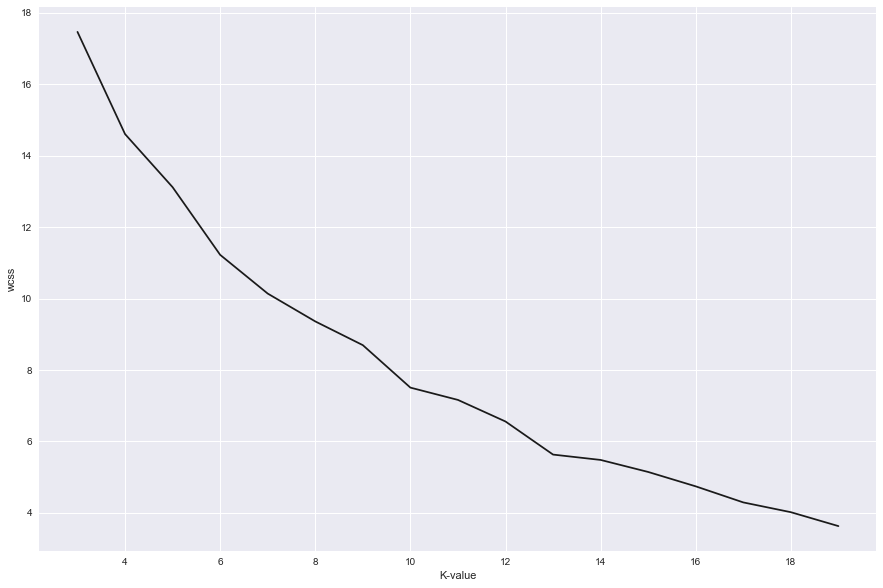

In [48]:
# Step:2 Get K-value
plt.figure(figsize=(15,10)) ### create canvas
from sklearn.cluster import KMeans
wcss = []
for i in range(3,20):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,20),wcss,c='k')
plt.xlabel('K-value')
plt.ylabel('wcss')
plt.show()

In [53]:
# Step:3 Initalize the cluster
from sklearn.cluster import KMeans

model = KMeans(n_clusters=9,random_state=45)

# Step:4 Fitting the data
model.fit(X)

# Step:5 Get labels
model.labels_

array([7, 7, 0, 0, 0, 0, 8, 0, 2, 0, 7, 8, 1, 2, 2, 2, 8, 8, 0, 5, 3, 6,
       6, 8, 2, 8, 3, 0, 1, 2, 1, 8, 0, 3, 7, 4, 5, 7, 6, 2, 3, 2, 4, 2])

In [54]:
# Step:6 print dataset with labels
data['cluster'] = pd.DataFrame(model.labels_)
data.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster
0,0.211979,0.580328,0.510836,0.925651,0.226926,0.091993,0.901370,0.973171,0.257005,0.330119,7
1,0.576041,0.436066,0.777090,0.959108,0.175184,0.565588,0.841096,0.934146,0.274718,0.448633,7
2,0.224146,0.586885,0.501548,0.918216,0.054030,0.206133,0.860274,0.265854,0.244122,0.169530,0
3,0.194665,0.514754,0.517028,0.947955,0.083270,0.122658,0.876712,0.258537,0.112077,0.372370,0
4,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.956164,0.319512,0.087923,0.288569,0


In [55]:
# Step:7 Intalize centroid
model.cluster_centers_

array([[0.13398846, 0.51693989, 0.58101135, 0.90912846, 0.22282962,
        0.23660799, 0.85388128, 0.27913279, 0.17545178, 0.2825113 ],
       [0.3309936 , 0.13989071, 0.09081527, 0.7905824 , 0.6259005 ,
        0.49744463, 0.44931507, 0.7902439 , 0.35437466, 0.76314867],
       [0.52373525, 0.30746812, 0.78293774, 0.87071458, 0.57540187,
        0.5771342 , 0.67914764, 0.45352304, 0.54482018, 0.4209132 ],
       [0.69197473, 0.44836066, 0.92182663, 0.86524164, 0.34493389,
        0.73040886, 0.77671233, 0.2804878 , 0.14355878, 0.75131487],
       [0.25596631, 0.09016393, 0.57894737, 0.57249071, 0.70715739,
        0.75894378, 0.49452055, 0.52926829, 0.97600644, 0.13437938],
       [0.19232569, 0.90491803, 0.48297214, 0.97769517, 0.11695906,
        0.30153322, 0.93424658, 0.08170732, 0.07761675, 0.97273843],
       [0.72827952, 0.04918033, 0.83281734, 0.40644362, 0.77896432,
        0.60420216, 0.14977169, 0.70487805, 0.09940955, 0.09519635],
       [0.29265325, 0.48065574, 0.6705882

## MODEL EVALUATION

In [56]:
# Model evaluation matrices
label = model.labels_  ### create new veriable and assgin to labels
label

from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,label)
silhou_score  # range of silhouette score -1 to +1


0.23603905050120852